In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')

# Optimal width plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
import os
from importlib import reload
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [3]:
def load_opt_w_data(names_of_lines):

    data = {}
    for name in names_of_lines:  

        data[f"A_area_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_area_{name}", name)
        )
        data[f"A_wavl_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_wavl_{name}", name)
        )
        data[f"Deltas_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"Deltas_{name}", name)
        )


    return data



lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

reload(un)
data = load_opt_w_data(lines)
# disgard_cont_point("CaK17", data)
data.keys()

dict_keys(['A_area_Ha17', 'A_wavl_Ha17', 'Deltas_Ha17', 'A_area_CaK17', 'A_wavl_CaK17', 'Deltas_CaK17', 'A_area_CaII17', 'A_wavl_CaII17', 'Deltas_CaII17'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3920\976252686.py:14: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


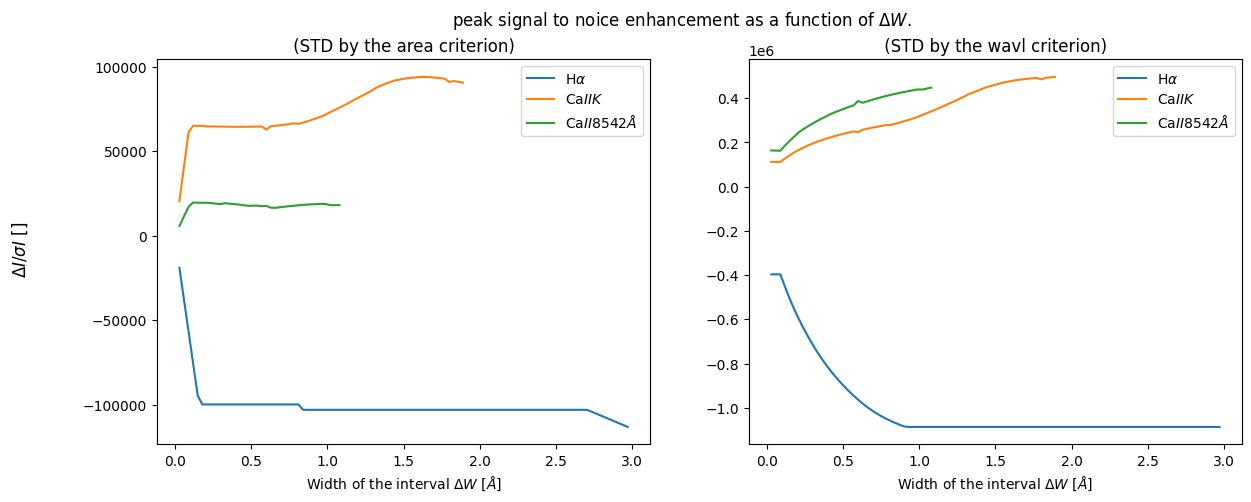

In [4]:
def plot_peak_enhancement(data, names_of_lines, long_names):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    fig.suptitle(r'peak signal to noice enhancement as a function of $\Delta W$.')
    fig.supylabel(r'$\Delta I/\sigma I$ []')
    ax_peak_enhancement(ax[0], data, names_of_lines, long_names, criterion='area')
    ax_peak_enhancement(ax[1], data, names_of_lines, long_names, criterion='wavl')
    plt.show()
    
    
def ax_peak_enhancement(ax, data, names_of_lines, long_names, criterion):
    for name in names_of_lines:
        A = data[f"A_area_{name}"] if criterion=="area" else data[f"A_wavl_{name}"]
        Deltas = data[f"Deltas_{name}"]
        MAX = np.nanmax(A, axis=1)
        ax.plot(Deltas, MAX, label=long_names[name])
        ax.set_title(f' (STD by the {criterion} criterion) ')
        ax.set_xlabel(r"Width of the interval $\Delta W$ $[\AA]$")

    ax.legend()

plot_peak_enhancement(data, lines, long_names)

In [5]:
# Full_line_ana(fig, ax, names_of_lines_list, scalefactor, name_of_flare='', name_of_show_line=None, data=None):
# if data is None:
#         data = get_data(names_of_lines_list)
#     for i, name in enumerate(names_of_lines_list):
#         wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, 
#                                                           area_factor=area_factor*scalefactor, normal=True, add_noise=False)
        
        
# def contrast_FOV_data(name_of_line, data, quiet_sun_subtraction=True, num=100, normal=True, scale_pix_to_saas=1/53.4):
#     return wav, DFOV*corr , time, line, std*corr


In [6]:

def stn_direct(weight_func, wav, DI, std):
    """_summary_

    Args:
        DI ((n_time, n_wav)-numpy array): difference intencity 
        std ((n_wav)-numpy array): the standard deviations for the standard deviations
        weight_func (function): A function returning the weight at any wavelength. 
        wav ((n_wav)-numpy array): the wavelength positions of the diff_spectr observations | (float)- the averaged std over the wavelengths. 

    Returns:
        (n_time)-arr: int (I(t,w)/std(w)) * g(w) array containing the weighted signal to noise ratio for the provided weights. 
    """
    weights = weight_func_to_weights(weight_func, wav)
    DS = DI / std
    return np.dot(DS, weights) # check if this is in the right order. 


def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])

# def weight_func_to_weights(weight_func, wav):
#     n = len(wav)
#     def i_unit_weight(i):
#         v = np.zeros(n)
#         v[i] = 1
#         f = lambda w : interp1d(wav,v)(w) * weight_func(w)
#         print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
#         return quad(f, wav[0], wav[-1])[0]
#     return np.array([i_unit_weight(i) for i in range(n)])
# possible weight functions 
def indicator_function(a,b):
    return lambda x : np.where(x > a, 1,0) * np.where( x < b ,  1, 0)

In [7]:
def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 


lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

data = get_data(lines)


### loading data

[[6.56131879e+03 6.56181879e+03 6.56201879e+03 6.56221879e+03
  6.56251879e+03 6.56266879e+03 6.56281879e+03 6.56296879e+03
  6.56311879e+03 6.56341879e+03 6.56361879e+03 6.56381879e+03
  6.56431879e+03]
 [8.18242360e-01 7.69945519e-01 7.29005290e-01 6.10015586e-01
  2.63634766e-01 2.21668118e-01 2.11332035e-01 2.25095888e-01
  2.74499943e-01 5.75517177e-01 6.91757808e-01 7.55231210e-01
  7.94790538e-01]
 [1.25952559e-09 1.06937248e-09 8.18224988e-10 5.95354710e-10
  3.47254059e-10 3.35726724e-10 3.77321341e-10 4.29107194e-10
  5.44105816e-10 7.52941320e-10 1.03487341e-09 1.05407538e-09
  1.29372224e-09]]


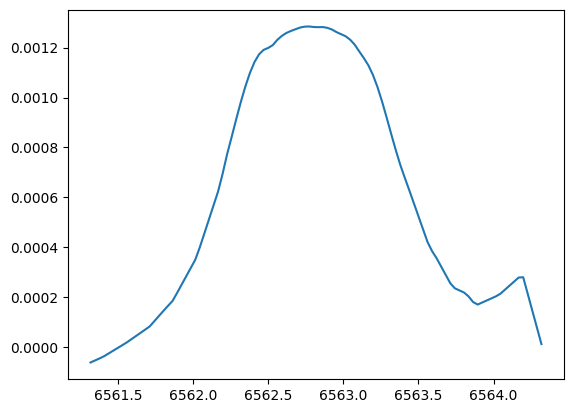

[1.28897311e-12 1.27717925e-12 1.26538538e-12 1.25359151e-12
 1.24179764e-12 1.23000377e-12 1.21820990e-12 1.20641603e-12
 1.19462216e-12 1.18282829e-12 1.17103443e-12 1.15924056e-12
 1.14744669e-12 1.13565282e-12 1.12385895e-12 1.11206508e-12
 1.10027121e-12 1.07490319e-12 1.03596087e-12 9.97018547e-13
 9.58076226e-13 9.19133905e-13 8.80191584e-13 8.41249263e-13
 8.06253072e-13 7.71695347e-13 7.37137622e-13 7.02579897e-13
 6.68022173e-13 6.33464448e-13 6.01580057e-13 5.75933470e-13
 5.50286882e-13 5.24640295e-13 4.98993707e-13 4.73347119e-13
 4.47700532e-13 4.22053944e-13 3.96407357e-13 3.70760769e-13
 3.54419527e-13 3.52036327e-13 3.49653126e-13 3.47269926e-13
 3.44886725e-13 3.47445699e-13 3.56045112e-13 3.64644525e-13
 3.73243938e-13 3.81843351e-13 3.91496249e-13 4.02202633e-13
 4.12909017e-13 4.23615401e-13 4.34321785e-13 4.52216025e-13
 4.75991232e-13 4.99766440e-13 5.23541647e-13 5.47316854e-13
 5.69779546e-13 5.91367228e-13 6.12954911e-13 6.34542593e-13
 6.56130276e-13 6.777179

array([4.94295552e+08, 4.84152182e+08, 5.23576402e+08, 5.77720083e+08,
       6.24903678e+08, 6.90546813e+08, 6.78789831e+08, 6.80037190e+08,
       7.13479491e+08, 7.12137982e+08, 7.08840516e+08, 7.04803585e+08,
       7.33663667e+08, 7.43051358e+08, 7.52573928e+08, 7.81133926e+08,
       8.29596124e+08, 8.58965735e+08, 8.64221371e+08, 9.13094575e+08,
       9.39232141e+08, 9.54945861e+08, 9.48258290e+08, 9.43193082e+08,
       9.41467396e+08, 9.36953255e+08, 9.41392434e+08, 9.29328462e+08,
       9.22685642e+08, 9.07158544e+08, 8.96567322e+08, 8.90211642e+08,
       8.88965731e+08, 8.79714363e+08, 8.83885608e+08, 8.70358639e+08,
       8.52310353e+08, 8.27769525e+08, 8.18035634e+08, 8.11834795e+08,
       7.99754040e+08, 7.82430447e+08, 7.55632457e+08, 7.45435988e+08,
       7.26204786e+08, 7.05136354e+08, 6.83812210e+08, 6.72623454e+08,
       6.59370948e+08, 6.54171149e+08, 6.41803847e+08, 6.30301844e+08,
       6.16863920e+08, 6.07291665e+08, 5.86048934e+08, 5.84570825e+08,
      

In [8]:
scalefactor = 2.4
name = "Ha17"

print(data[f"quiet_sun_{name}"])

wav, DFD , time, line, std = un2.difference_FD_data(name,data, quiet_sun_subtraction=False, 
                                                          area_factor=60**2/np.pi/959.63**2*scalefactor, add_noise=False)
plt.plot(wav, DFD[5])
plt.show()
weight_func = indicator_function(6561.3490928 , 6564.28848698)

print(std)
stn_direct(weight_func, wav, DFD, std)


### calculation signal to noise ratio in time for a given weight function

In [9]:
def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])


weights = weight_func_to_weights(weight_func, wav)
DS = DFD / std

stn = np.dot(DS, weights)

DS, weights, wav, np.shape(DS), np.shape(DFD), np.shape(std),  np.shape(time), np.shape(stn)


0.0 0.0 0
0.01515152165889625 1.0 1
0.03030303271654834 1.0 1
0.030303032693222952 1.0 1
0.03030303452196852 1.0 1
0.0 1.0 1
0.030303032973548825 1.0 1
0.03030303276455741 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303257859143 1.0 1
0.030303032805955567 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032219275026 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303281418716 1.0 1
0.03030303326937331 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032708681347 1.0 1
0.03030303273346383 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032907083735 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032764821988 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303271487832 1.0 1
0.030303032714878306 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303276482198 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032907083763 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0

(array([[-1.39815011e+08, -1.35794288e+08, -1.31698615e+08, ...,
         -2.22969896e+06, -5.22994974e+07, -1.01245073e+08],
        [-1.38405952e+08, -1.34414930e+08, -1.30349512e+08, ...,
          1.42628626e+07, -3.55724604e+07, -8.42888249e+07],
        [-1.21917874e+08, -1.17274054e+08, -1.12543669e+08, ...,
          2.82866345e+07, -2.19822596e+07, -7.11224602e+07],
        ...,
        [-4.25120884e+08, -4.25354579e+08, -4.25592629e+08, ...,
         -3.32684042e+08, -3.77119404e+08, -4.20557054e+08],
        [-4.24439341e+08, -4.24766862e+08, -4.25100488e+08, ...,
         -3.29416593e+08, -3.73735804e+08, -4.17059910e+08],
        [-4.27528072e+08, -4.27559245e+08, -4.27590999e+08, ...,
         -3.28885548e+08, -3.72969295e+08, -4.16063226e+08]]),
 array([0.        , 0.01515152, 0.03030303, 0.03030303, 0.03030303,
        0.        , 0.03030303, 0.03030303, 0.        , 0.        ,
        0.03030303, 0.03030303, 0.        , 0.        , 0.        ,
        0.03030303, 0.   

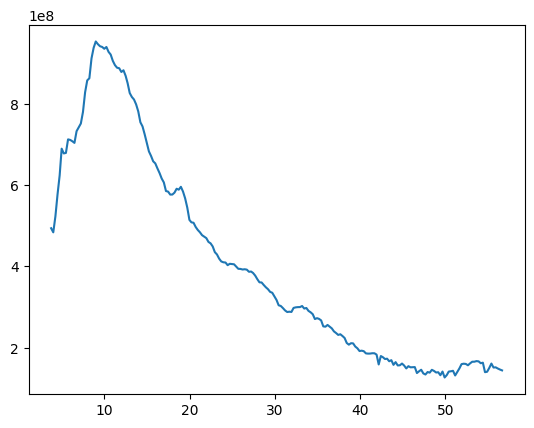

In [10]:
plt.plot(time, stn)

### Lower threshold for detection cutt off

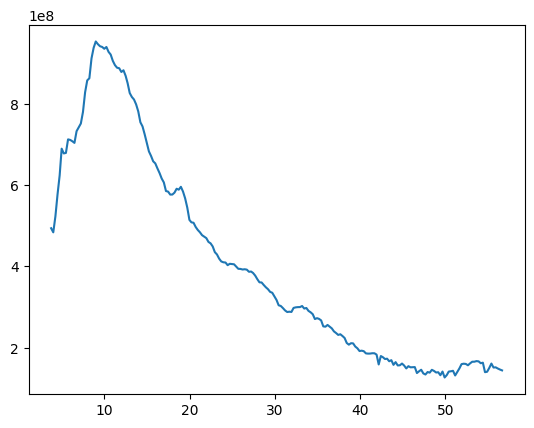

In [11]:
def lower_threshold_cutoff(t, a):
    """cut off array under thershold

    Args:
        t (fl): lower threshold
        a (arr): input array
    """
    return np.where(a > t, a, 0)

t = 1e7 # for example

stnl = lower_threshold_cutoff(t, stn)
plt.plot(time, stnl)

### different meassures:
#### given a specific timelength C



In [12]:
timestep  = (time[-1] - time[0]) / (len(time) - 1)
timestep

0.24944968553459115

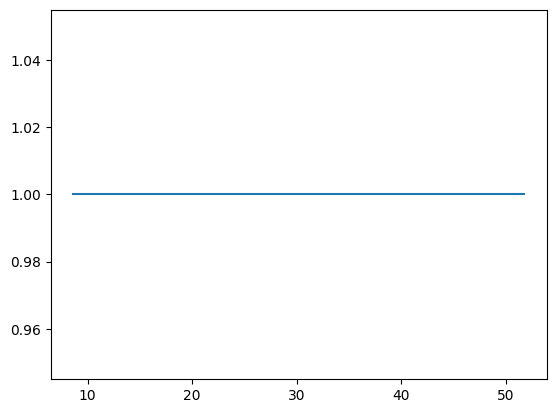

In [13]:
C = 10 #example
N = round(C / timestep)

# measure 0:
stn0 = np.where(stnl >0, 1, 0)
stn0 = np.convolve(stn0, np.ones(N)/N, mode='valid')
time0 = np.convolve(time, np.ones(N)/N, mode='valid')

plt.plot(time0, stn0)

In [14]:
def max_rolling(A,K):
    return np.array([max(A[j:j+K]) for j in range(len(A)-K)])

alpha = 0 the measure yields 1.0000000000000002
alpha = 0.1 the measure yields 353850094.78515327
alpha = 1 the measure yields 419992094.9652753
alpha = 3 the measure yields 548861298.4961213
alpha = 10 the measure yields 738292211.17233
alpha = 20 the measure yields 819667218.8952082
alpha = 1000 the measure yields inf
alpha = inf the measure yields 954945860.6105094


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3920\122547552.py:14: RuntimeWarning: overflow encountered in power
  stn_alpha = stn ** alpha


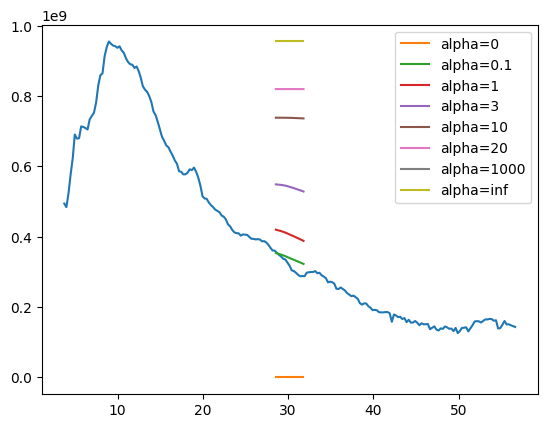

In [15]:
# finite measure
def measure(alpha, stn, time, C=10):
    timestep  = (time[-1] - time[0]) / (len(time) - 1)
    N = round(C / timestep)

    if alpha == 0:
        stn_alpha = np.where(stn >0, 1, 0)
        stn_alpha = np.convolve(stn_alpha, np.ones(N)/N, mode='valid')
        
    elif alpha == np.inf:
        stn_alpha = max_rolling(stn, N-1)
        
    else:
        stn_alpha = stn ** alpha
        stn_alpha = np.convolve(stn_alpha, np.ones(N)/N, mode='valid') ** (1 / alpha)
    
    time_alpha = np.convolve(time, np.ones(N)/N, mode='valid')

    plt.plot(time_alpha, stn_alpha, label = f'alpha={alpha}')
    return np.max(stn_alpha)

plt.plot(time, stnl)
for i in [0,0.1,1,3,10,20,1000,np.inf]:
    print(f"alpha = {i} the measure yields {measure(i, stn, time, C= 50)}")
    

plt.legend()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3920\122547552.py:14: RuntimeWarning: overflow encountered in power
  stn_alpha = stn ** alpha


inf

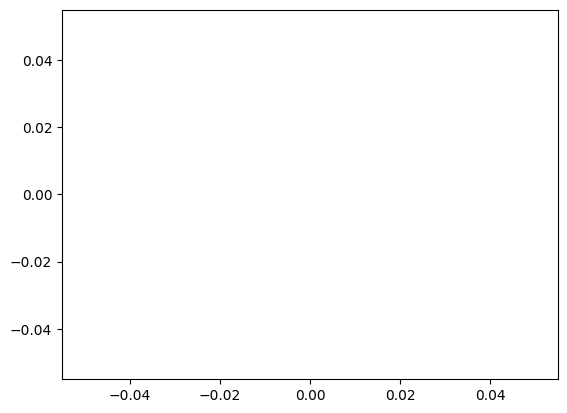

In [16]:
measure(100, stnl, time)
